In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#To grab live data, we'll use yfinance (Yahoo Finance) data
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [4]:
#I want to look at a 3 specific stocks for Electric Vehicles. We'll look at Tesla, Rivian and Lucid
ev_cars = ['TSLA', 'RIVN', 'LCID' ]

In [10]:
#We'll set the start and and end time for the stocks using datetime.  We'll use the start time 2 years ago and the end time as the current time

end_time = datetime.now()
start_time = datetime(end_time.year - 2, end_time.month, end_time.day)

In [25]:
#Lets create a dictionary of the company names
company_dict = {'TSLA':'Tesla', 
                'RIVN':'Rivian', 
                'LCID':'Lucid', 
               }

In [13]:
#Now we'll pull the data for the stocks in the EV car list

for stocks in ev_cars:
    globals()[stocks] = yf.download(stocks, start_time, end_time)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [21]:
#Lets look at the data we collected. Looking at Tesla (TSLA) we can see the below.
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-22,278.043335,285.576660,267.033325,273.843323,273.843323,83288100
2022-02-23,276.809998,278.433319,253.520004,254.679993,254.679993,95256900
2022-02-24,233.463333,267.493347,233.333328,266.923340,266.923340,135322200
2022-02-25,269.743347,273.166656,260.799988,269.956665,269.956665,76067700
2022-02-28,271.670013,292.286682,271.570007,290.143341,290.143341,99006900


In [22]:
#And looking at descritions of the data we see the below
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,232.646214,237.805942,227.099913,232.469847,232.469847,1.138021e+08
std,51.233487,52.069654,50.168405,50.988606,50.988606,4.043769e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,193.130005,197.500000,189.440002,193.809998,193.809998,8.609850e+07
50%,235.156662,240.300003,231.369995,236.086670,236.086670,1.073432e+08
75%,266.149994,269.923340,260.250000,265.116669,265.116669,1.354013e+08
max,378.766663,384.290009,362.433319,381.816681,381.816681,3.065906e+08


In [19]:
#We have 501 records since this only counts 2 years of market days, meaning it won't count weekends or holidays.
#Lets now look at the data/columns that we have in the data
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-02-22 to 2024-02-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       501 non-null    float64
 1   High       501 non-null    float64
 2   Low        501 non-null    float64
 3   Close      501 non-null    float64
 4   Adj Close  501 non-null    float64
 5   Volume     501 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.4 KB


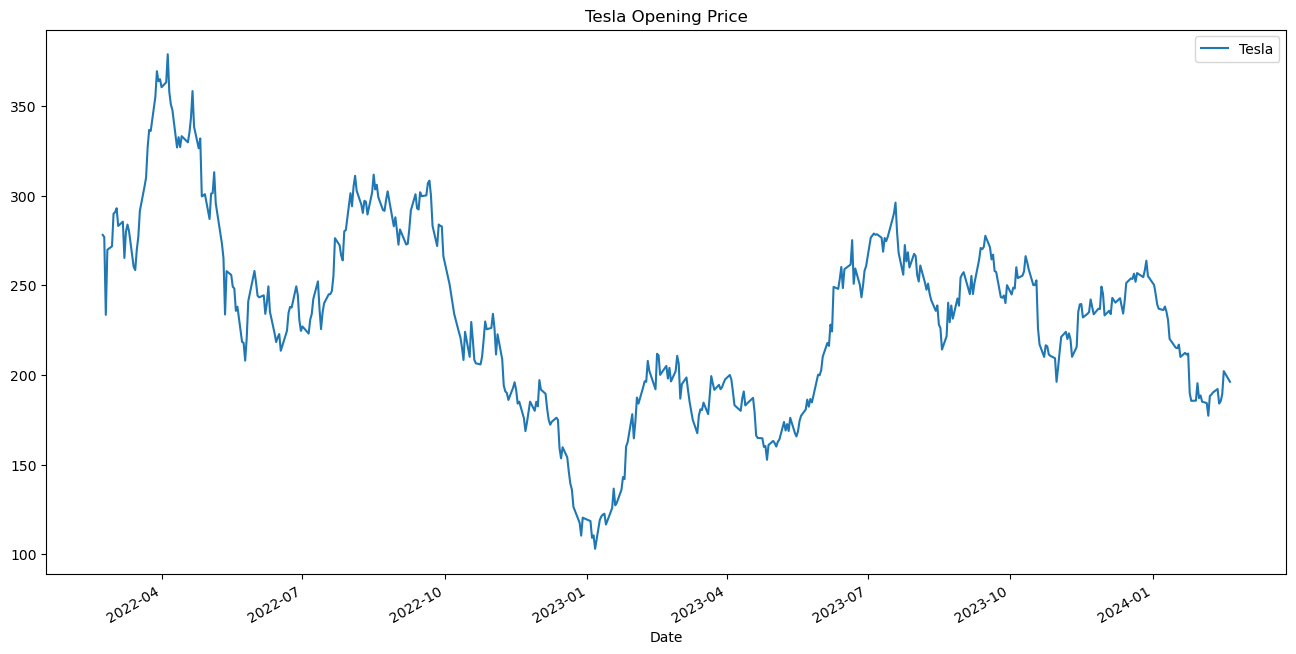

In [24]:
#Lets look at a visual of the opening prices of Tesla
TSLA['Open'].plot(label='Tesla', figsize=(16,8), title='Tesla Opening Price')
plt.legend()

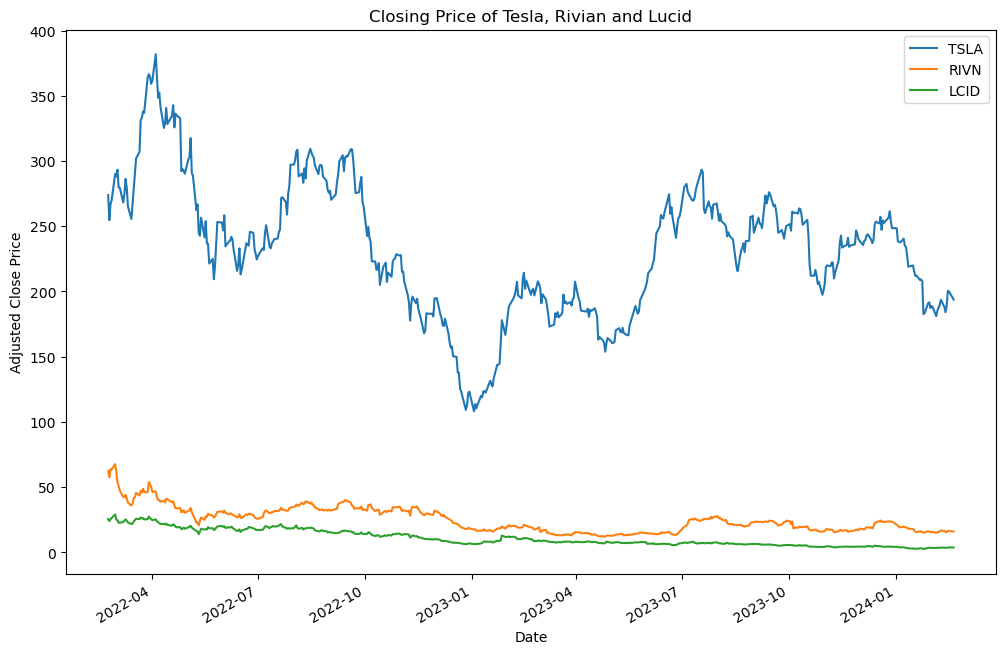

In [37]:
#Define the list of companies
companies = [TSLA,RIVN,LCID]

#Lets look at the stock prices of the 3 stocks using the adjusted close, which is more of a standard for stock prices.
for stocks in companies:
    stocks['Adj Close'].plot(figsize=(12, 8))
    plt.ylabel('Adjusted Close Price')
    plt.xlabel('Date')
    plt.title('Closing Price of Tesla, Rivian and Lucid')
plt.legend(ev_cars)

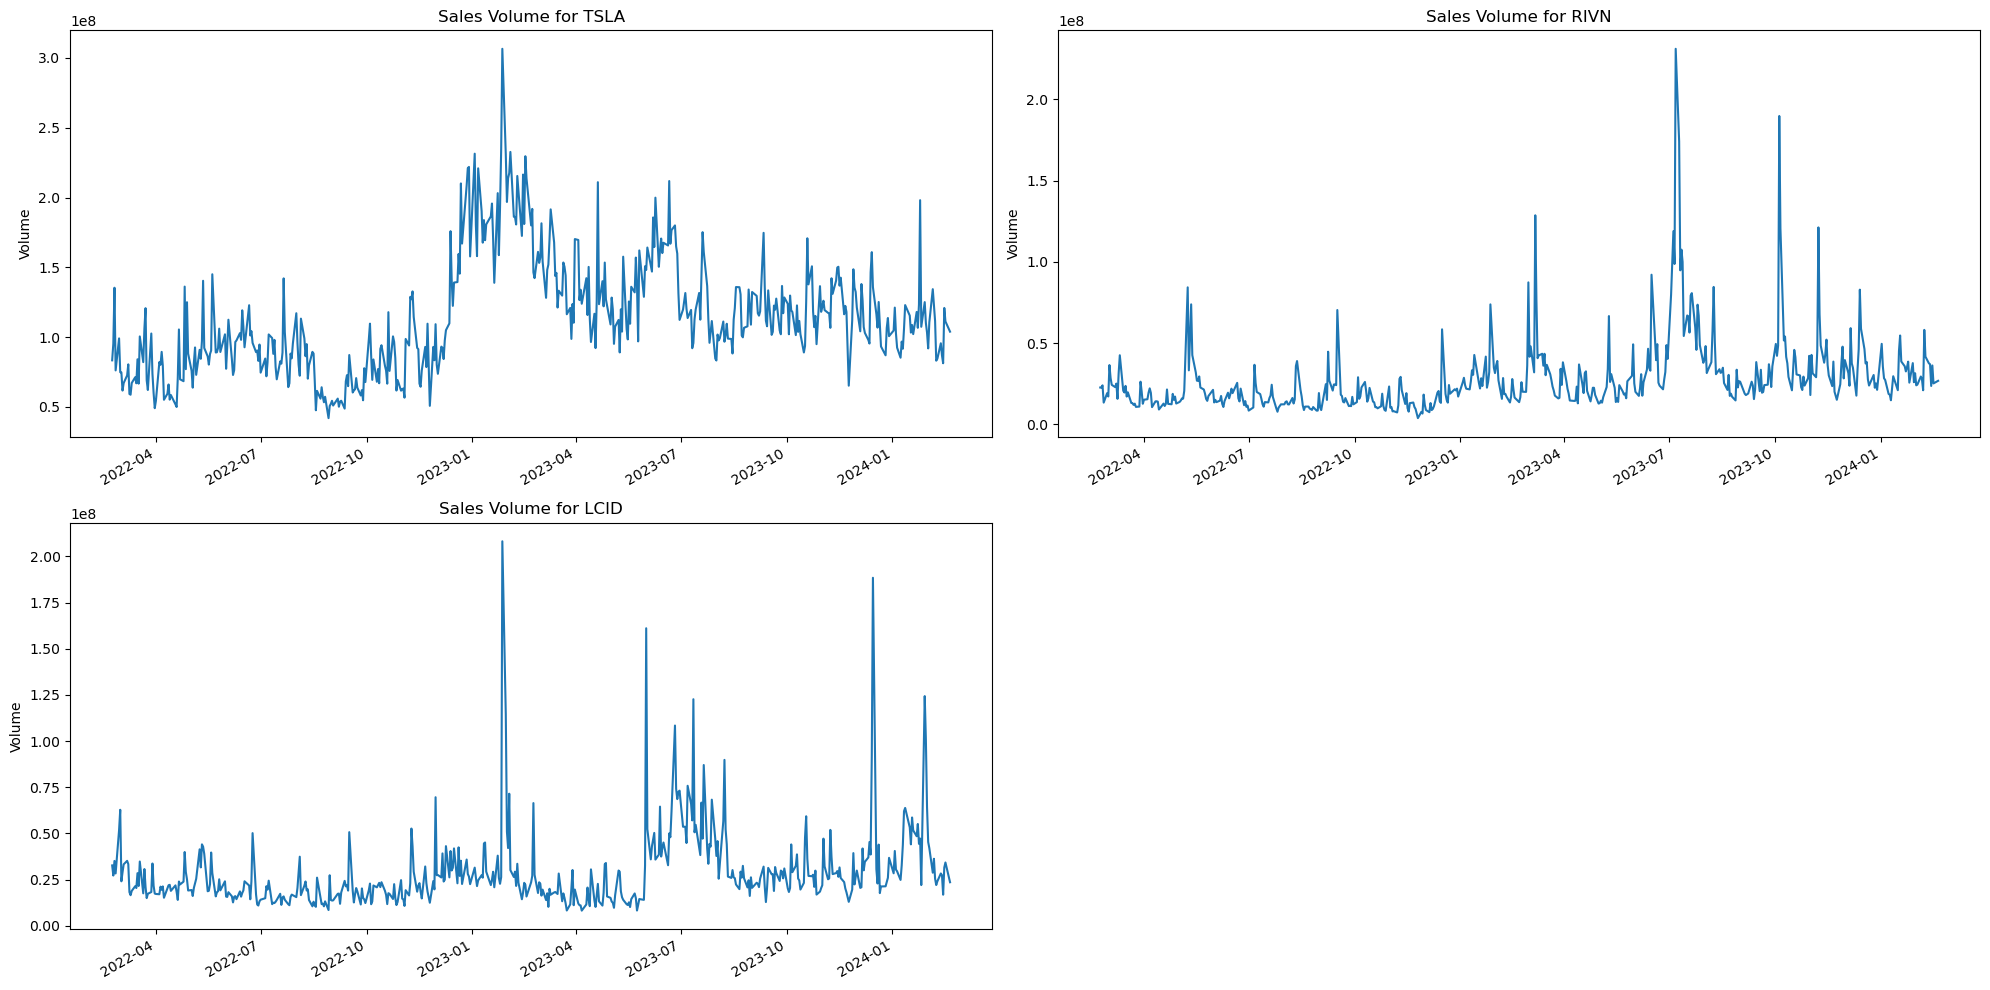

In [47]:
#Now lets look at the volume of stocks for each of the 3 stocks, but in seperate charts
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.8, bottom=1.6)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {ev_cars[i - 1]}")
    
plt.tight_layout()

In [51]:
#Now we can look to create an LTSM model with the 3 companies
#We'll start by importing the libraries we need
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [52]:
#Now we'll build the model.  We'll start by creating a dataframe with only the 'Close' column
data = TSLA.filter(['Close'])

In [53]:
#Now we will convert the dataframe to a numpy array
dataset = data.values

In [54]:
#And get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [55]:
#Next we will scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [56]:
#Now we will create the training dataset

train_data = scaled_data[0:int(training_data_len), :]

#And we will split the data into x_train and y_train data sets
x_train = []
y_train = []

In [57]:
#Lets look at the last 60 days of data to predict the next day
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.60552876, 0.53551721, 0.58024721, 0.5913292 , 0.66507946,
       0.65769949, 0.67659984, 0.62715702, 0.62593917, 0.584887  ,
       0.60902386, 0.65112339, 0.62595133, 0.57364669, 0.53835472,
       0.58161111, 0.62830172, 0.66650423, 0.70765385, 0.72685868,
       0.81553912, 0.82178653, 0.83982214, 0.83582778, 0.93471342,
       0.94412714, 0.93733173, 0.91737198, 0.92588438, 1.        ,
       0.93400711, 0.87859706, 0.89260184, 0.8539121 , 0.79355777,
       0.80697799, 0.85011263, 0.8046033 , 0.82809471, 0.85715154,
       0.7951044 , 0.83356268, 0.82902022, 0.82045909, 0.67237413,
       0.67857271, 0.67370146, 0.66548128, 0.70467028, 0.71235463,
       0.76517079, 0.66855013, 0.65925828, 0.56361196, 0.57935816,
       0.49893442, 0.49162759, 0.54227605, 0.48720694, 0.53255795])]
[0.46947571080676465]

[array([0.60552876, 0.53551721, 0.58024721, 0.5913292 , 0.66507946,
       0.65769949, 0.67659984, 0.62715702, 0.62593917, 0.584887  ,
       0.60902386, 0.65112339, 0.62

In [58]:
#Now we will convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [59]:
#And we will reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [61]:
#Now time for the fun stuff.  Lets build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#Then compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#And train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

416/416 [==============================] - 4s 8ms/step - loss: 0.0051


In [62]:
#Now we need to do the same thing with the testing data set.  We'll create an new arrawy with the scaled values
#and create the data sets for x_test and y_test, convert it to a numpy array and reshape the data
test_data = scaled_data[training_data_len - 60: , :]


x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [63]:
#Now lets get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#and then get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 0s 301ms/step


6.882590128088259

/var/folders/lv/762hr1k14db3s2vjbs44q8t00000gn/T/ipykernel_82559/2631228853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


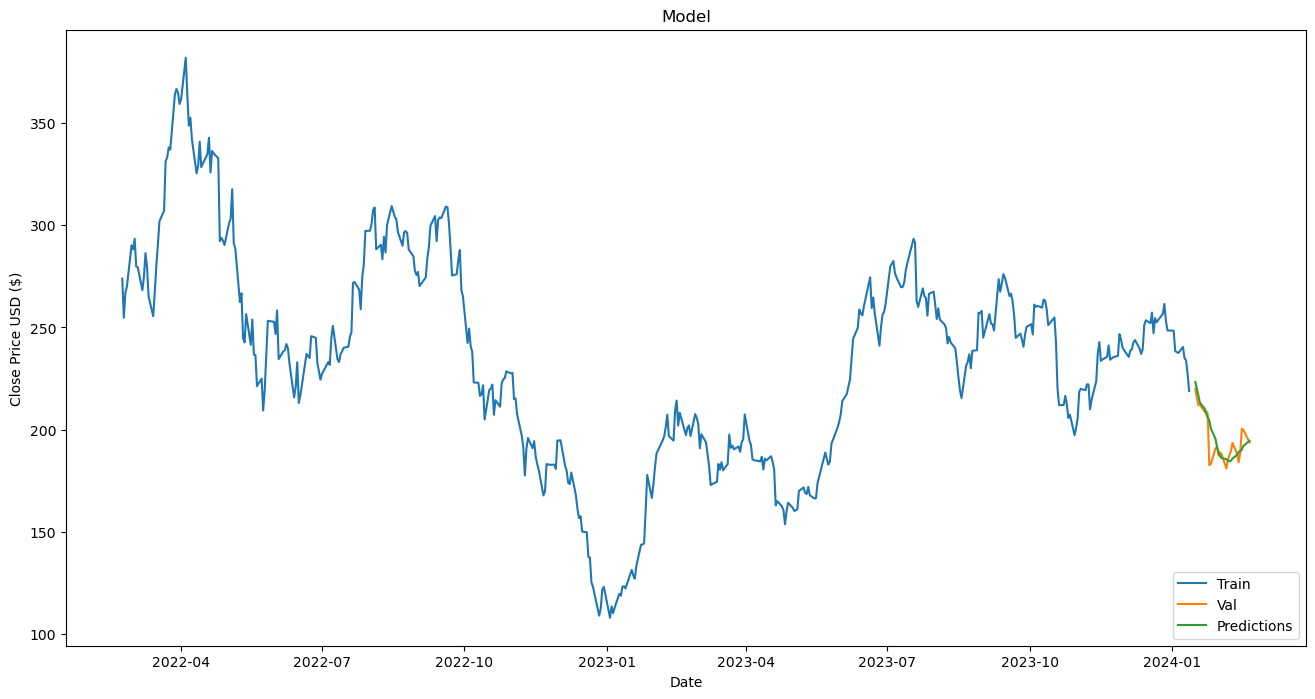

In [64]:
#Lets plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Then visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [66]:
#Look pretty good!
#Lets look at the actual close vs predictions
valid

,Close,Predictions
Date,,
2024-01-16,219.910004,223.281265
2024-01-17,215.550003,219.915558
2024-01-18,211.880005,216.524353
2024-01-19,212.190002,213.144348
2024-01-22,208.800003,210.326645
2024-01-23,209.139999,207.831924
2024-01-24,207.830002,205.980728
2024-01-25,182.630005,204.655411
2024-01-26,183.250000,200.574020


In [73]:
#Lets run a price prediction on TESLA
#Lets get the quote for Tesla
tesla_quote = yf.download('TSLA', start=start_time, end=end_time)

#And create a new dataframe for it
new_df_tsla = tesla_quote.filter(['Close'])

#As we did with the above, lets get the last 60 day closing price values and convert the dataframe to an array
last_60_days_tsla = new_df_tsla[-60:].values

#Lets then scale the data to be values between 0 and 1
last_60_days_scaled_tsla = scaler.transform(last_60_days_tsla)

#Create an empty list, append the last 60 days
X_test = []
X_test.append(last_60_days_scaled_tsla)

#Now lets convert the X_test data set to a numpy array and reshape the data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Lets get the predicted scaled price and undo the scaling
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 11ms/step
[[196.27159]]


[*********************100%%**********************]  1 of 1 completed


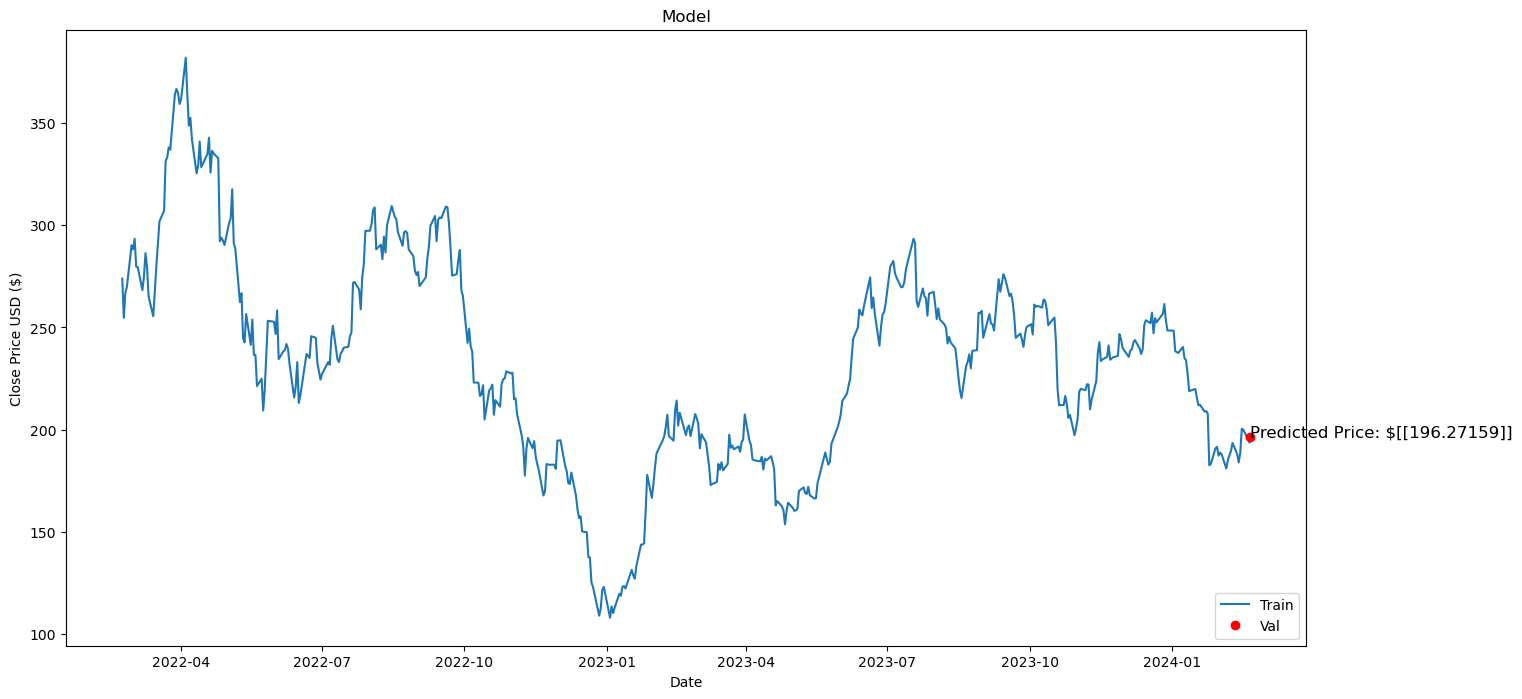

In [76]:
#add a data label to the plot
tesla_quote2 = yf.download('TSLA', start=start_time, end=end_time)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(tesla_quote2['Close'])
plt.plot(tesla_quote2['Close'].index[-1], pred_price, 'ro')
plt.text(tesla_quote2['Close'].index[-1], pred_price, 'Predicted Price: $' + str(pred_price), fontsize=12)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [75]:
#Now lets look at the actual price
tesla_quote2['Close'].tail(1)

Date
2024-02-20    193.759995
Name: Close, dtype: float64

In [ ]:
#Well shucks. Little did we know, Tesla is actually down 3% for the day due to Ford's price cuts!